In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


      response time  response voltage   signal time  signal voltage
0     -1.180000e-07           -0.0016 -1.180000e-07             0.2
1     -1.160000e-07           -0.0016 -1.160000e-07             0.2
2     -1.140000e-07           -0.0016 -1.140000e-07             0.2
3     -1.120000e-07           -0.0016 -1.120000e-07             0.2
4     -1.100000e-07           -0.0016 -1.100000e-07             0.2
...             ...               ...           ...             ...
2494   4.870000e-06           -0.0008  4.870000e-06             0.2
2495   4.872000e-06           -0.0016  4.872000e-06             0.2
2496   4.874000e-06           -0.0008  4.874000e-06             0.2
2497   4.876000e-06           -0.0008  4.876000e-06             0.2
2498   4.878000e-06           -0.0008  4.878000e-06             0.2

[2499 rows x 4 columns]


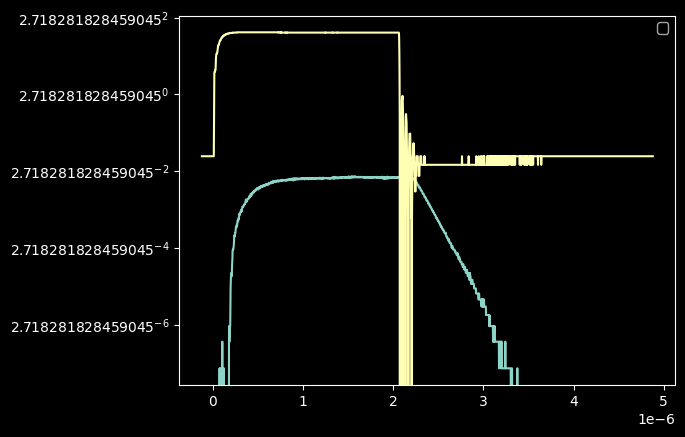

In [2]:
measuring_temp = {"-10C","0C","10C","20C","30C","40C","50C","60C","70C","80C","90C","100C"}

# for i in range(len(measuring_temp)):
df = pd.read_csv("/Users/rhillman/school/phys461/2-temperature_flourescence/data/100C/100.3C.csv", usecols=['signal time', 'signal voltage', 'response time', 'response voltage'])
    # test = os.listdir("/run/media/user1/Seagate/PHYS-461/2-temperature_flourescence/data/" + measuring_temp[2])
print(df)
# path_to_data = os.chdir()

# df.filter()

plt.plot(df["response time"], df["response voltage"])
plt.plot(df["signal time"], df["signal voltage"])
plt.yscale('log', base=np.e)
plt.legend()

In [3]:
def remove_offset(df, column_name):
    head = df.head(20)
    
    offset = np.mean(head[column_name])

    df[column_name] = df[column_name] - offset

    return df

In [4]:
df

,response time,response voltage,signal time,signal voltage
0,-1.180000e-07,-0.0016,-1.180000e-07,0.2
1,-1.160000e-07,-0.0016,-1.160000e-07,0.2
2,-1.140000e-07,-0.0016,-1.140000e-07,0.2
3,-1.120000e-07,-0.0016,-1.120000e-07,0.2
4,-1.100000e-07,-0.0016,-1.100000e-07,0.2
...,...,...,...,...
2494,4.870000e-06,-0.0008,4.870000e-06,0.2
2495,4.872000e-06,-0.0016,4.872000e-06,0.2
2496,4.874000e-06,-0.0008,4.874000e-06,0.2
2497,4.876000e-06,-0.0008,4.876000e-06,0.2


In [5]:
df = remove_offset(df, 'signal voltage')
df

,response time,response voltage,signal time,signal voltage
0,-1.180000e-07,-0.0016,-1.180000e-07,-2.775558e-17
1,-1.160000e-07,-0.0016,-1.160000e-07,-2.775558e-17
2,-1.140000e-07,-0.0016,-1.140000e-07,-2.775558e-17
3,-1.120000e-07,-0.0016,-1.120000e-07,-2.775558e-17
4,-1.100000e-07,-0.0016,-1.100000e-07,-2.775558e-17
...,...,...,...,...
2494,4.870000e-06,-0.0008,4.870000e-06,-2.775558e-17
2495,4.872000e-06,-0.0016,4.872000e-06,-2.775558e-17
2496,4.874000e-06,-0.0008,4.874000e-06,-2.775558e-17
2497,4.876000e-06,-0.0008,4.876000e-06,-2.775558e-17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


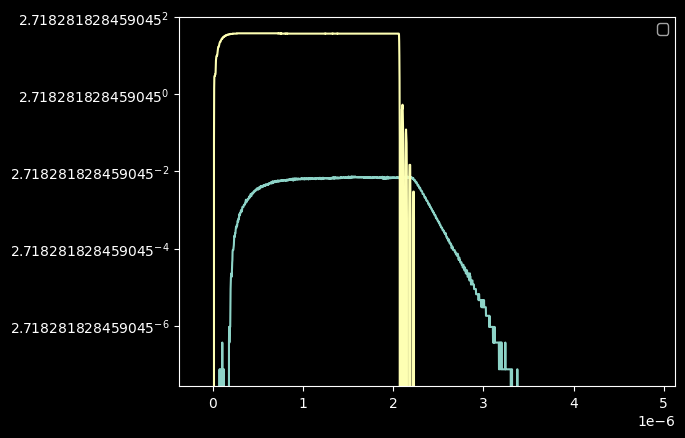

In [6]:
plt.plot(df["response time"], df["response voltage"])
plt.plot(df["signal time"], df["signal voltage"])
plt.yscale('log', base=np.e)
plt.legend()

In [7]:
def derivative(df, column_name, ind, dep):
    new_column = [0]
    for i, val in enumerate(df[column_name]):
        new_column.append(val*0.6 + newColumn[i]*0.4)
    return newColumn[1:]

SyntaxError: invalid syntax (3170778963.py, line 1)

In [12]:
df[df['signal time'] > 2.1e-6].head(50)



,response time,response voltage,signal time,signal voltage
1110,0.000002,0.1160,0.000002,0.68
1111,0.000002,0.1152,0.000002,0.76
1112,0.000002,0.1144,0.000002,0.76
1113,0.000002,0.1160,0.000002,0.60
1114,0.000002,0.1152,0.000002,0.44
1115,0.000002,0.1152,0.000002,0.36
1116,0.000002,0.1160,0.000002,0.12
1117,0.000002,0.1160,0.000002,-0.24
1118,0.000002,0.1136,0.000002,-0.44
1119,0.000002,0.1152,0.000002,-0.52
